### Task_2 - 1: K- Unsupervised learning

This notebook will walk through some of the Unsupervised learning  algorithms (K-means clustering - DBSAN)

### Author: Abdalrahman Almalah.
Copyright Abdalrahman Almalah, 2024



K-means clustering begins with the description of a cost function over a parameterized set of possible clustering, and the objective of the clustering algorithm is to find a minimum cost partitioning (clustering). The clustering function is turned into an optimization problem under this model.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?


C:\Users\ASUS\anaconda3\envs\env_1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\env_1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\env_1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\env_1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

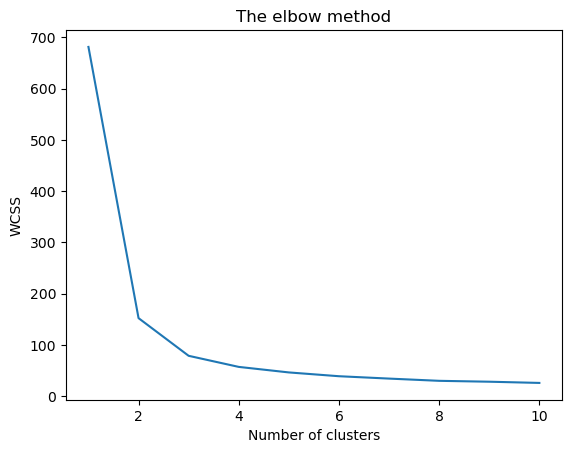

In [2]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [3]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\ASUS\anaconda3\envs\env_1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


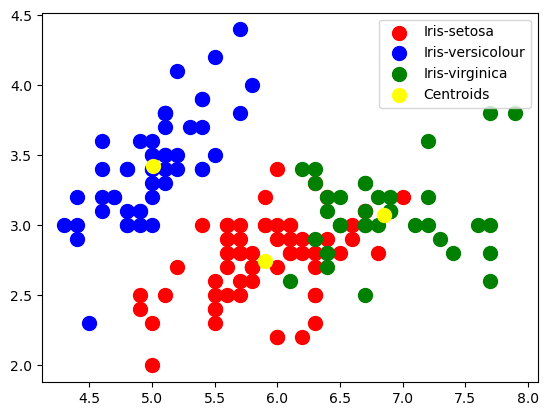

In [4]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a powerful clustering algorithm that excels at identifying clusters of different shapes and sizes, even in the presence of noise or outliers. Unlike K-Means, which requires the number of clusters to be specified beforehand, DBSCAN discovers clusters based on their density.


Key Parameters:

###eps (epsilon): This parameter defines the maximum distance between two points to be considered neighbors. It essentially determines the size of the neighborhood around a data point.
In the code: eps=2 sets a neighborhood radius of 2 units in the feature space.

###min_samples (minimum samples): This parameter specifies the minimum number of points within an eps-neighborhood for a point to be classified as a core point, which is a dense region. Points with fewer neighbors are considered border points or noise.

##In the code: min_samples=2 indicates that at least two points must be within the 2-unit radius for a point to be a core point.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
#Creates a dataset containing 149 data points (samples) distributed in two-dimensional space (features) using the make_blobs function. The random_state ensures reproducibility.
x, y = make_blobs(random_state=9, n_samples=149)
#Creates a DBSCAN object, specifying the eps and min_samples parameters as discussed above.
dbscan = DBSCAN(eps=2, min_samples=2)

cls = dbscan.fit_predict(x)
print("Cluster membership values:\n{}".format(cls))

plt.scatter(x[:, 0], x[:, 1], c=cls + 1, cmap='viridis')  # Adjust colors as desired
plt.show()


: 

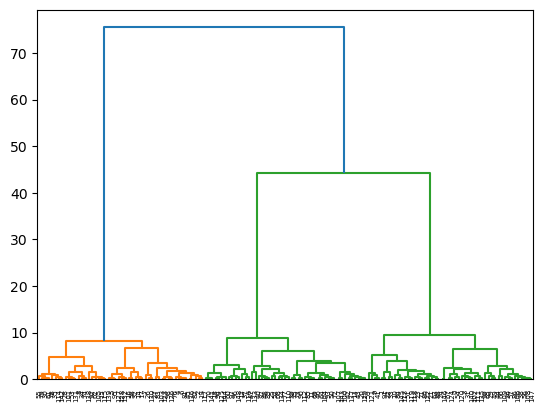

In [14]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(x))
plt.show()